# So to address the uncertainty analysis issues faced in the previous notebook we will consider the worst and best case nozzil position and the worst and best case shock location

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

In [7]:
inchHg= 29.03 # inch Hg for calculating pressure
inchTOm = 25.4 * 1e-3 # inch to m conversion
T = 23.01 + 273.15 # K
g = 9.81 # m/s^2 gravity
R = 287.05 # J/(kg K) specific gas constant of air

# desnity from temperature calculation
rho_Hg = 13545 # kg/m^3 density of mercury
rho_H2O = 1000 # kg/m^3 density of water

u_rho_Hg = 0.1 / rho_Hg # relative uncertainty in density of mercury
u_inchesHg = 0.001 / inchHg # relative uncertainty of measured inches of mercury


In [8]:
P0 =  rho_Hg * g * inchHg * inchTOm # Pa
u_P0 = u_rho_Hg + u_inchesHg # relative uncertainty in pressure

print(f"The Atmospheric Pressure is {P0} Pa")

# density of air calculation
rho_air = P0 / (R * T) # kg/m^3
print(f"The density of air is {rho_air} kg/m^3")

The Atmospheric Pressure is 97978.04492490001 Pa
The density of air is 1.1525103032207134 kg/m^3


In [9]:
oriface_diameter = 17.47 * 1e-3 # mm to m
oriface_area = np.pi * oriface_diameter**2 / 4 # m^2

pipe_area = 10 * oriface_area # ?
print(f"The area of the oriface is {oriface_area} m^2")

# flow rate calculation
Cd = 0.62
def calc_mass_flow_rate(dh):
    dp = rho_H2O * g * dh
    rA = oriface_area / pipe_area
    Q = Cd * oriface_area * np.sqrt(2 * dp / (rho_air)) 
    return rho_air * Q

C1_dh_oriface = 13.2 - 9.6
C2_dh_oriface = 13.7 - 8.8
C3_dh_oriface = 13.7 - 8.8
C4_dh_oriface = 13.7 - 8.8

C1_md = calc_mass_flow_rate(C1_dh_oriface * 1e-2)
C2_md = calc_mass_flow_rate(C2_dh_oriface * 1e-2)
C3_md = calc_mass_flow_rate(C3_dh_oriface * 1e-2)
C4_md = calc_mass_flow_rate(C4_dh_oriface * 1e-2)

print(f"The flow rate for C1 is {C1_md} kg/s")
print(f"The flow rate for C2 is {C2_md} kg/s")
print(f"The flow rate for C3 is {C3_md} kg/s")
print(f"The flow rate for C4 is {C4_md} kg/s")

The area of the oriface is 0.00023970422632724826 m^2
The flow rate for C1 is 0.0042402410000425385 kg/s
The flow rate for C2 is 0.004946947833382961 kg/s
The flow rate for C3 is 0.004946947833382961 kg/s
The flow rate for C4 is 0.004946947833382961 kg/s


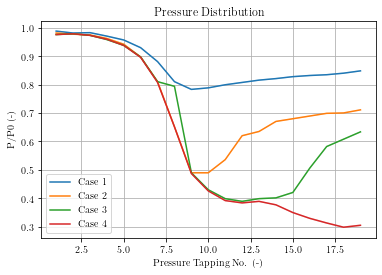

In [11]:
def get_rp(tab):
    dh = (tab[:,2] - tab[:,1]) * 1e-2 # m
    p = P0 - rho_Hg * g * dh

    return p / P0

def get_u_rp(tab):
    h1 = tab[:,1]
    h2 = tab[:,2]

    u_h1 = 0.1 / h1 # accuracy of 0.1 mm
    u_h2 = 0.1 / h2 # accuracy of 0.1 mm
    
    u_rp = u_P0 + u_rho_Hg + np.sqrt(u_h1**2 + u_h2**2)
    return u_rp

C1 = np.loadtxt('../Supersonic_Nozzle/case1.txt', skiprows=1)
C1_rp, C1_u_rp = get_rp(C1), get_u_rp(C1)
C2 = np.loadtxt('../Supersonic_Nozzle/case2.txt', skiprows=1)
C2_rp, C2_u_rp = get_rp(C2), get_u_rp(C2)
C3 = np.loadtxt('../Supersonic_Nozzle/case3.txt', skiprows=1)
C3_rp, C3_u_rp = get_rp(C3), get_u_rp(C3)
C4 = np.loadtxt('../Supersonic_Nozzle/case4.txt', skiprows=1)
C4_rp, C4_u_rp = get_rp(C4), get_u_rp(C4)

C3_SHOCK_LOCATION = 15

fig,ax = plt.subplots()
x = C1[:,0]
ax.plot(x, C1_rp, label='Case 1')
ax.fill_between(x, C1_rp * (1 - C1_u_rp), C1_rp * (1 + C1_u_rp), alpha=0.2)
ax.plot(x, C2_rp, label='Case 2')
ax.fill_between(x, C2_rp * (1 - C2_u_rp), C2_rp * (1 + C2_u_rp), alpha=0.2)
ax.plot(x, C3_rp , label='Case 3')
ax.fill_between(x, C3_rp * (1 - C3_u_rp), C3_rp * (1 + C3_u_rp), alpha=0.2)
ax.plot(x, C4_rp, label='Case 4')
ax.fill_between(x, C4_rp * (1 - C4_u_rp), C4_rp * (1 + C4_u_rp), alpha=0.2)

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('P/P0 (-)')
plt.title('Pressure Distribution')
plt.legend()
plt.grid()
plt.show()

In [12]:

def calc_M(rp):
    # calc mach number from pressure ratio
    g = 1.4
    M2 = (rp ** -((g-1)/g) - 1) * 2 / (g - 1)
    return np.sqrt(M2)

def calc_u_M(rp, u_rp):
    # u_M = u_rp * dM/drp

    g = 1.4
    dM2 = - 2 / g * rp ** (-((g-1)/g) - 1)
    u_M = u_rp * dM2
    return u_M

In [13]:

C1_M, C1_u_M = calc_M(C1_rp), calc_u_M(C1_rp, C1_u_rp)
C2_M, C2_u_M = calc_M(C2_rp), calc_u_M(C2_rp, C2_u_rp)
C3_M, C3_u_M = calc_M(C3_rp), calc_u_M(C3_rp, C3_u_rp)
C4_M, C4_u_M = calc_M(C4_rp), calc_u_M(C4_rp, C4_u_rp)

